# Load Data

In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv("train.txt",header=None,sep=";", names=['Comment','Emotion'],encoding='utf-8')
test_data=pd.read_csv("test.txt",header=None,sep=";", names=['Comment','Emotion'],encoding='utf-8')


In [3]:
train_data

,Comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [4]:
train_data.shape

(16000, 2)

In [5]:
train_data['length']=[len(x) for x in train_data['Comment']]
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [6]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [7]:
train_data.duplicated().sum()

1

In [8]:
train_data.drop_duplicates(inplace=True)

In [9]:
train_data['Emotion'].value_counts()

Emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

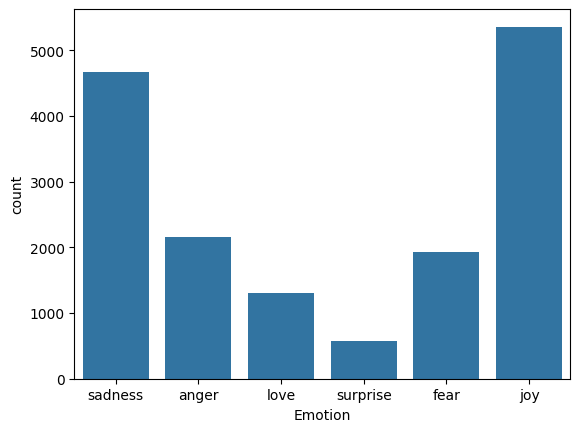

In [11]:
sns.countplot(x=train_data['Emotion'])
plt.show()

---------> mon dataset présente un déséquilibre significatif 

In [ ]:
#check if data distributed or not 

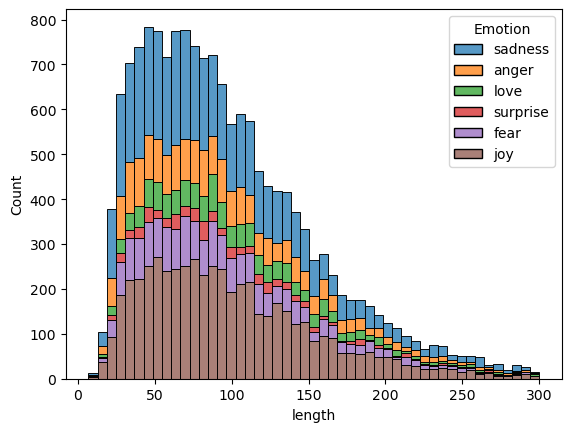

In [ ]:
length_values=train_data['length'].values
sns.histplot(data=train_data,x='length',hue='Emotion', multiple='stack')
plt.show()

In [12]:
!pip install wordcloud
from wordcloud import WordCloud

----> WordCloud  est une visualisation graphique qui montre les mots les plus fréquents dans un texte.

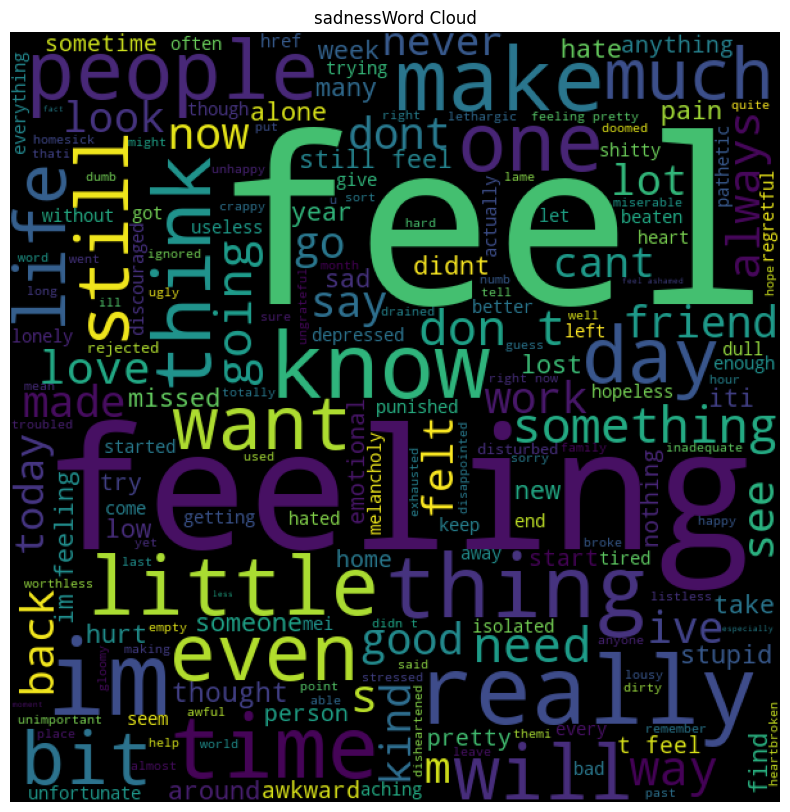

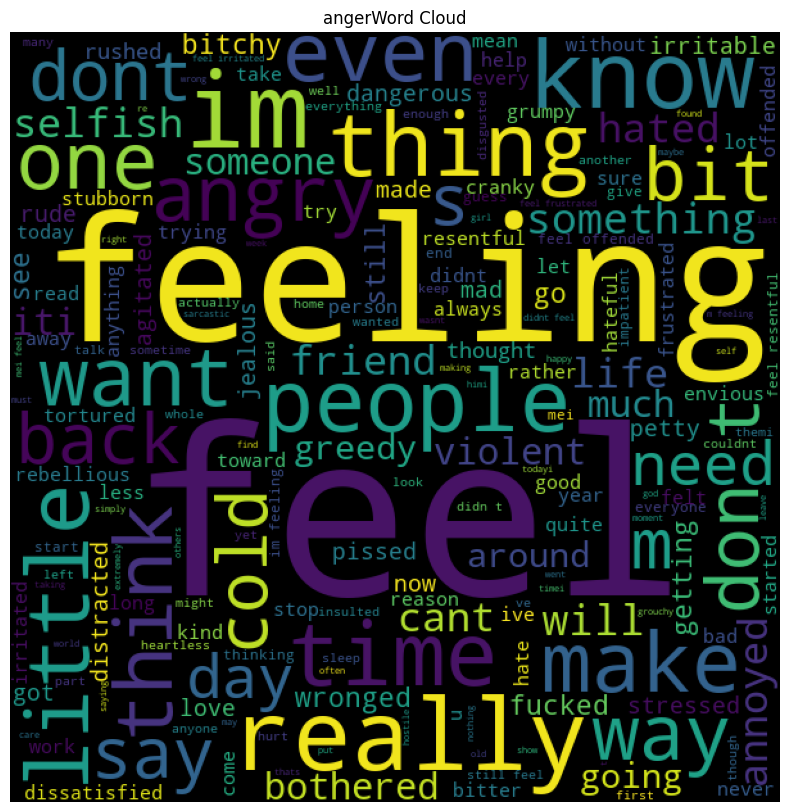

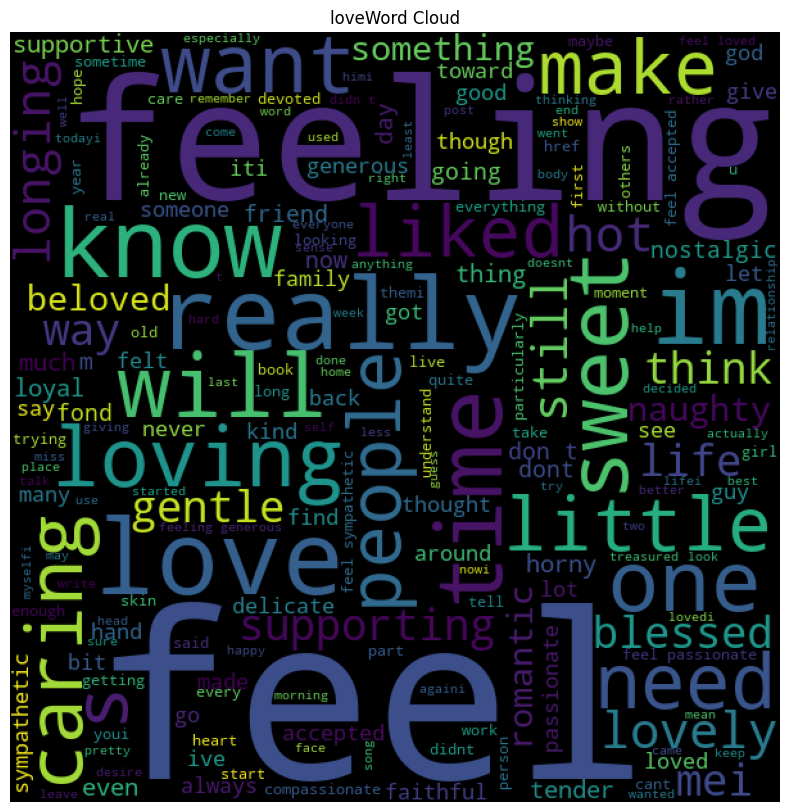

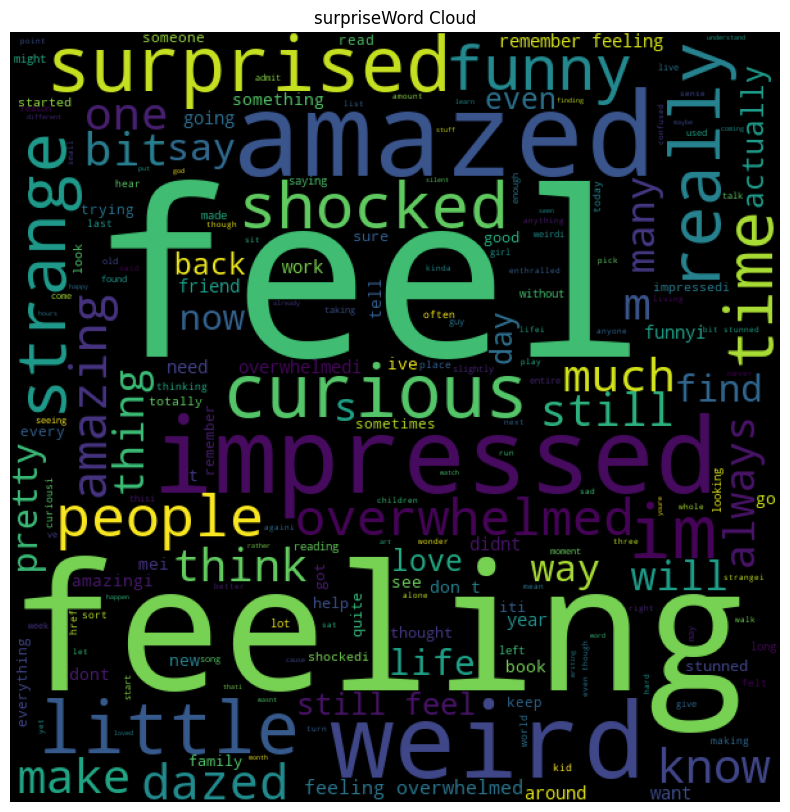

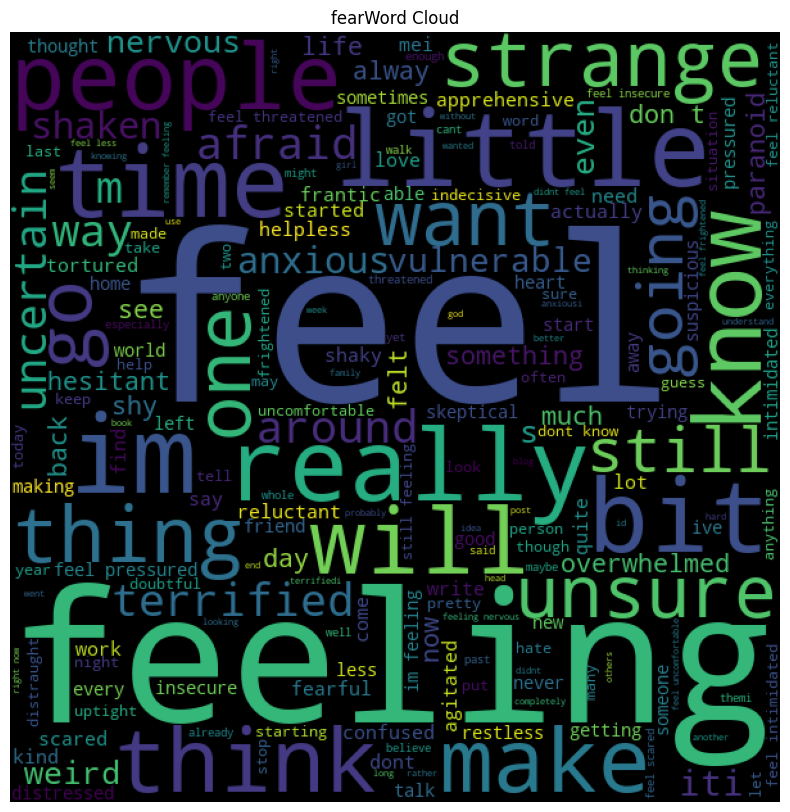

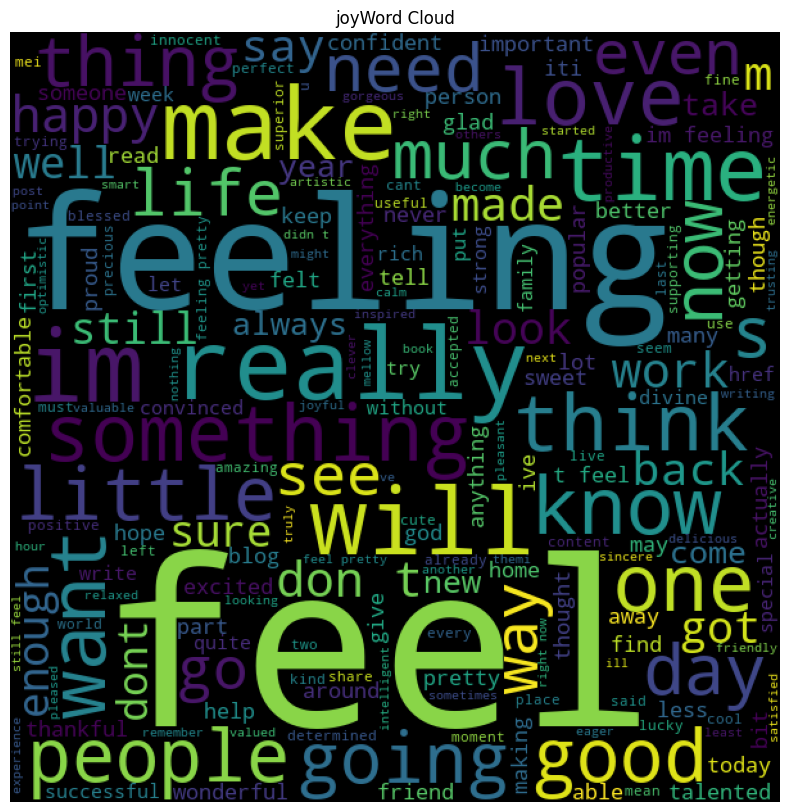

In [13]:
# words image
def words_image (wordcloud,emotion):
    plt.figure(figsize=(10,10))
    plt.title(emotion+"Word Cloud")
    plt.imshow(wordcloud)
    plt.axis("off")
    
emotions_list=train_data['Emotion'].unique()
for emotion in emotions_list:
    text= "".join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
    wc=WordCloud(width=600,height=600).generate(text)
    words_image(wc,emotion)

In [ ]:
#data Processing

In [14]:
# Après l'encodage
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_data['Emotion_Encoded'] = lb.fit_transform(train_data['Emotion'])

# Afficher la correspondance émotion -> indice
emotion_mapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print("Correspondance émotion -> indice :")
for emotion, index in emotion_mapping.items():
    print(f"{emotion}: {index}")

Correspondance émotion -> indice :
anger: 0
fear: 1
joy: 2
love: 3
sadness: 4
surprise: 5


In [15]:
pip install emoji

   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/608.4 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/608.4 kB ? eta -:--:--
   ---------------------------------------- 608.4/608.4 kB 1.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached typer_slim-0.20.0-py3-none-any.whl.metadata (16 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpathlib-0.23.0-py3-none-any.whl.metadata (16 kB)
  Using cached smart_open-7.5.0-py3-none-any.whl.metadata (24 kB)
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
    --------------------------------------- 0.3/14.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.2 MB 1.3 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/14.2 MB 1.5 MB/s eta 0:00:10
   -- ------------------------------------- 1.0/14.2 MB 1.4 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/14.2 MB 1.3 MB/s eta 0:00:10
   ---- -----

In [18]:
import numpy, spacy
print(f"NumPy: {numpy.__version__}, spaCy: {spacy.__version__}")

NumPy: 1.26.4, spaCy: 3.8.11


In [21]:
import re
import emoji
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import spacy

# Initialisation unique des composants (à faire une fois)
nlp = spacy.load('en_core_web_sm')
tokenizer = TweetTokenizer(reduce_len=True, preserve_case=False, strip_handles=True)


In [23]:
# Import des bibliothèques nécessaires
import re
import emoji
import spacy
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')  # Téléchargement des stopwords anglais

# Initialisation des outils
nlp = spacy.load('en_core_web_sm')  # Chargement du modèle SpaCy pour l'anglais
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
stop_words = set(stopwords.words('english'))  # Chargement des mots vides

# Dictionnaire de contractions négatives à remplacer par "not"
negation_contractions = {
    # Avec apostrophes
    "aren't": "not", "isn't": "not", "wasn't": "not", "weren't": "not",
    "don't": "not", "doesn't": "not", "didn't": "not",
    "can't": "not", "couldn't": "not", "won't": "not", "wouldn't": "not",
    "shouldn't": "not", "mustn't": "not", "haven't": "not", "hasn't": "not", "hadn't": "not",
    # Sans apostrophes
    "arent": "not", "isnt": "not", "wasnt": "not", "werent": "not",
    "dont": "not", "doesnt": "not", "didnt": "not",
    "cant": "not", "couldnt": "not", "wont": "not", "wouldnt": "not",
    "shouldnt": "not", "mustnt": "not", "havent": "not", "hasnt": "not", "hadnt": "not"
}



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# Réduction des caractères répétés (ex: "soooo" → "soo")
def reduce_repeated_characters(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

# Gestion des mots précédés de "not" : fusion en "not_mot"
def handle_negations(tokens):
    result = []
    negate_next = False
    for token in tokens:
        if token == "not":
            negate_next = True
            continue
        if negate_next:
            result.append(f"not_{token}")
            negate_next = False
        else:
            result.append(token)
    return result

In [25]:
def preprocess_text(text, return_tokens=False):
    if not isinstance(text, str) or not text.strip():
        return [] if return_tokens else ""

    # Remplacement des contractions négatives par "not"
    for contraction, replacement in negation_contractions.items():
        text = re.sub(rf"\b{contraction}\b", replacement, text, flags=re.IGNORECASE)

    # Conversion des emojis en mots
    text = emoji.demojize(text, delimiters=(" ", " "))

    # Suppression des liens, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|@\w+|#\w+', '', text)

    # Suppression de la ponctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Nettoyage des espaces et mise en minuscule
    text = re.sub(r'\s+', ' ', text).lower()

    # Réduction des lettres répétées (ex: "goooood" → "good")
    text = reduce_repeated_characters(text)

    # Tokenisation
    tokens = tokenizer.tokenize(text)

    # Traitement des négations
    tokens = handle_negations(tokens)
      # Lemmatisation + suppression des stopwords
    lemmatized = [
        token.lemma_ for token in nlp(" ".join(tokens))
        if token.text not in stop_words and len(token.text) > 2
    ]

    # Retour des résultats
    return lemmatized if return_tokens else " ".join(lemmatized)

In [26]:
text = "I didnt like this movie! It's sooo bad 😠 #worstfilm"
print("Texte prétraité (string):", preprocess_text(text))
print("Texte prétraité (tokens):", preprocess_text(text, return_tokens=True))


Texte prétraité (string): not_like movie soo bad angry_face
Texte prétraité (tokens): ['not_like', 'movie', 'soo', 'bad', 'angry_face']


In [ ]:
text = "You aren't happy about this decision? 😒 That's not acceptable at all!"
print(preprocess_text(text))

not_happy decision unamused_face not_acceptable


In [27]:
import pandas as pd

# Charger les données
train_data = pd.read_csv("train.txt", header=None, sep=";", names=['Comment', 'Emotion'], encoding='utf-8')
test_data = pd.read_csv("test.txt", header=None, sep=";", names=['Comment', 'Emotion'], encoding='utf-8')

# Appliquer le prétraitement à la colonne "Comment" de train_data et test_data
train_data['Processed_Comment'] = train_data['Comment'].apply(preprocess_text)
test_data['Processed_Comment'] = test_data['Comment'].apply(preprocess_text)

# Affichage des premières lignes pour vérifier
print("Prétraitement sur train_data:")
print(train_data.head())

print("\nPrétraitement sur test_data:")
print(test_data.head())


Prétraitement sur train_data:
                                             Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                   Processed_Comment  
0                                 not_feel humiliate  
1  feel hopeless damned hopeful around someone ca...  
2                 grab minute post feel greedy wrong  
3  ever feel nostalgic fireplace know still property  
4                                       feel grouchy  

Prétraitement sur test_data:
                                             Comment  Emotion  \
0  im feeling rather rotten so im not very ambiti...  sadness   
1          im updating my blog because i feel shitty  sadness   
2  i never make her sepa

In [28]:
# Sauvegarder les données prétraitées dans de nouveaux fichiers CSV
train_data.to_csv("train_preprocessed.csv", index=False, encoding='utf-8')
test_data.to_csv("test_preprocessed.csv", index=False, encoding='utf-8')


In [29]:

# Charger les fichiers
train_df = pd.read_csv("train_preprocessed.csv")
test_df = pd.read_csv("test_preprocessed.csv")


In [30]:
# Distribution des classes dans le jeu d'entraînement
print("Distribution des classes - TRAIN :")
print(train_df['Emotion'].value_counts())

# Distribution des classes dans le jeu de test
print("\nDistribution des classes - TEST :")
print(test_df['Emotion'].value_counts())


Distribution des classes - TRAIN :
Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

Distribution des classes - TEST :
Emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64


In [31]:
from sklearn.preprocessing import LabelEncoder


In [32]:
# Initialiser l'encodeur
label_encoder = LabelEncoder()

# Encoder les labels du train
train_df['Emotion_encoded'] = label_encoder.fit_transform(train_df['Emotion'])

# Encoder les labels du test (en se basant sur les labels du train)
test_df['Emotion_encoded'] = label_encoder.transform(test_df['Emotion'])


In [34]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Correspondance des labels :", label_mapping)


Correspondance des labels : {'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}


In [35]:
train_df.head()

,Comment,Emotion,Processed_Comment,Emotion_encoded
0,i didnt feel humiliated,sadness,not_feel humiliate,4
1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damned hopeful around someone ca...,4
2,im grabbing a minute to post i feel greedy wrong,anger,grab minute post feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,love,ever feel nostalgic fireplace know still property,3
4,i am feeling grouchy,anger,feel grouchy,0


In [36]:
train_df.to_csv("train_encoded.csv", index=False, encoding='utf-8')
test_df.to_csv("test_encoded.csv", index=False, encoding='utf-8')
